In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import make_regression
from patsy import dmatrix
from sklearn.linear_model import LinearRegression
import statsmodels.stats.api as sms
import numpy as np

%matplotlib inline

/Users/jakekong/.pyenv/versions/3.6.1/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [47]:
orders = pd.read_csv('orders.csv')


# order_id = order identification number
# user_id = user identification number
# order_number = how many times an user had made purchases
# order_dow = day of week when an order had been made (Mon - Sun by 0 -6)
# order_hour_of_day = hour of day when an oder had been made (1 - 23 in hours)
# days_since_prior_order = day interval from the previous purchase to the next purchase

In [3]:
orders.sort_values('order_id')

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1868044,1,112108,train,4,4,10,9.0
3355525,2,202279,prior,3,5,9,8.0
3417191,3,205970,prior,16,5,17,12.0
2958007,4,178520,prior,36,1,9,7.0
2593373,5,156122,prior,42,6,16,9.0
370620,6,22352,prior,4,1,12,30.0
2374153,7,142903,prior,11,2,14,30.0
50028,8,3107,prior,5,4,6,17.0
2308534,9,139016,prior,14,0,19,5.0
2249060,10,135442,prior,4,6,8,8.0


In [4]:
products = pd.read_csv('products.csv')
products.tail()

# product_id = product identification number
# product_name = product name
# aisle_id = aisle number
# department_id = department number 

,product_id,product_name,aisle_id,department_id
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8
49687,49688,Fresh Foaming Cleanser,73,11


In [5]:
aisles = pd.read_csv('aisles.csv')
aisles.tail()

# aisle (string) is matched with aisle_id (int)

,aisle_id,aisle
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief
133,134,specialty wines champagnes


In [6]:
departments = pd.read_csv('departments.csv')
departments.tail()

# department (string) is matched with department_id (int)

,department_id,department
16,17,household
17,18,babies
18,19,snacks
19,20,deli
20,21,missing


# making a dataframe that conveys product_desc
* product_id
* product_name
* aisle, aisle_id
* department, departmnet_id

In [7]:
merged_data = pd.merge(left = (pd.merge(left = products, right = aisles)), right = departments)
merged_data.to_csv('merged_data.csv', index = False)

In [8]:
product_desc = pd.read_csv('merged_data.csv')

In [9]:
product_desc = product_desc.sort_values(['product_id'], ascending = True)
product_desc.tail()

,product_id,product_name,aisle_id,department_id,aisle,department
46968,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,spirits,alcohol
19959,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen vegan vegetarian,frozen
48383,49686,Artisan Baguette,112,3,bread,bakery
37921,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,cat food care,pets
25484,49688,Fresh Foaming Cleanser,73,11,facial care,personal care


In [10]:
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__prior.tail()

# this dataframe is about the orders that happened in the older history

,order_id,product_id,add_to_cart_order,reordered
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1
32434488,3421083,5020,10,1


In [11]:
order_products__train = pd.read_csv('order_products__train.csv')
order_products__train.tail()

# it seems that this dataframe should be used to train the model

,order_id,product_id,add_to_cart_order,reordered
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1
1384616,3421070,4724,3,1


In [12]:
merged_data1 = pd.merge(left = order_products__train, right = product_desc)

In [14]:
merged_data2 = pd.merge(left = order_products__prior, right = product_desc)

### it seems that we should build a model based on the data, order_products__prior and order_products__train
* eval_set train will be our dependent feature while prior being our independent features

### then we can use the built model to predict order_products__test data
* similarly, we use prior data as our indepdent features to predict eval_set = test data

# what type of features do i think i need?
* let's start with all features given from datasets
    * product_id : our indepdent variable
    * order_id, add_to_cart_order, reordered, aisle_id, department_id, order_number, order_dow,	order_hour_of_day, days_since_prior_order
    
# Let's make a training model by order_products_prior
* first, I need to merge data tables together

In [39]:
data = pd.merge(left = order_products__prior, right = orders)

In [42]:
data.head(20)

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,3,5,9,8.0
1,2,28985,2,1,202279,3,5,9,8.0
2,2,9327,3,0,202279,3,5,9,8.0
3,2,45918,4,1,202279,3,5,9,8.0
4,2,30035,5,0,202279,3,5,9,8.0
5,2,17794,6,1,202279,3,5,9,8.0
6,2,40141,7,1,202279,3,5,9,8.0
7,2,1819,8,1,202279,3,5,9,8.0
8,2,43668,9,0,202279,3,5,9,8.0
9,3,33754,1,1,205970,16,5,17,12.0


# Let's view the shopping pattern of the consumer with user_id, 112108 
### prior & train dataset separation is ignored
* User 112108 has made 4 purchases in total
* User's order sequence can be recognized by order_number.
* This leads us to knowing that the order 1427983 was the first order; also days_since_prior_order == NaN proves it
* Therefore, order_id does not have a meaning of sequence

In [67]:
orders[orders['user_id']== 112108]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1868041,1427983,112108,prior,1,1,14,NaN
1868042,2541372,112108,prior,2,1,10,7.0
1868043,186706,112108,prior,3,2,21,15.0
1868044,1,112108,train,4,4,10,9.0


# User 112108's purchase lists at order 1427983
* As we already know, consumer's order 1427983 does not have reordered value (=0) since it was the first time.

In [69]:
order_products__prior[order_products__prior['order_id']== 1427983]

,order_id,product_id,add_to_cart_order,reordered
13529737,1427983,42001,1,0
13529738,1427983,43633,2,0
13529739,1427983,30881,3,0
13529740,1427983,49302,4,0
13529741,1427983,22035,5,0
13529742,1427983,11109,6,0
13529743,1427983,14947,7,0
13529744,1427983,44359,8,0


# User 112108's second purchase lists bring reordered products
* reordered products at the consumer's second order are 49302, 11109, 14947, 44359, 22035

In [70]:
order_products__prior[order_products__prior['order_id']== 2541372]

,order_id,product_id,add_to_cart_order,reordered
24096763,2541372,49302,1,1
24096764,2541372,11109,2,1
24096765,2541372,14947,3,1
24096766,2541372,44359,4,1
24096767,2541372,22035,5,1
24096768,2541372,24852,6,0
24096769,2541372,2067,7,0
24096770,2541372,5707,8,0


# User 112108 repurchased a few products he bought at his first order
* This can prove how long it takes for the consumer to consume product
* 43633 is the product he bought at his first order and at this time.
* The consumer continues to buy the product 14947 since the first shopping

In [71]:
order_products__prior[order_products__prior['order_id']== 186706]

,order_id,product_id,add_to_cart_order,reordered
1770588,186706,14947,1,1
1770589,186706,5707,2,1
1770590,186706,44632,3,0
1770591,186706,30881,4,1
1770592,186706,43633,5,1


# Similar patterns shown at the consumer's last purchase order

In [73]:
order_products__train[order_products__train['order_id']== 1]

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1


# Let's see what products they are that User 112108 purchsed
* merged_data1 = pd.merge(left = order_products__train, right = product_desc)
* merged_data2 = pd.merge(left = order_products__prior, right = product_desc)

In [76]:
merged_data2[merged_data2['order_id']== 1427983]

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
9857549,1427983,22035,5,0,Organic Whole String Cheese,21,16,packaged cheese,dairy eggs
10697523,1427983,14947,7,0,Pure Sparkling Water,115,7,water seltzer sparkling water,beverages
11122126,1427983,44359,8,0,Organic Small Bunch Celery,83,4,fresh vegetables,produce
13829764,1427983,42001,1,0,"Tuna Ventresca, in Olive Oil",95,15,canned meat seafood,canned goods
22867733,1427983,11109,6,0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
24719293,1427983,30881,3,0,Naturally Smoked Oysters in Pure Olive Oil,95,15,canned meat seafood,canned goods
29455798,1427983,43633,2,0,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods
31699834,1427983,49302,4,0,Bulgarian Yogurt,120,16,yogurt,dairy eggs


In [75]:
merged_data2[merged_data2['order_id']== 2541372]

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
2123125,2541372,24852,6,0,Banana,24,4,fresh fruits,produce
9415751,2541372,2067,7,0,Plus Cranberry Almond + Antioxidants with Maca...,3,19,energy granola bars,snacks
9877223,2541372,22035,5,1,Organic Whole String Cheese,21,16,packaged cheese,dairy eggs
10706961,2541372,14947,3,1,Pure Sparkling Water,115,7,water seltzer sparkling water,beverages
11144353,2541372,44359,4,1,Organic Small Bunch Celery,83,4,fresh vegetables,produce
22869222,2541372,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
29377776,2541372,5707,8,0,Dark Chocolate Cinnamon Pecan Bar,3,19,energy granola bars,snacks
31699885,2541372,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs


In [77]:
merged_data2[merged_data2['order_id']== 186706]

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
3699781,186706,44632,3,0,Sparkling Water Grapefruit,115,7,water seltzer sparkling water,beverages
10687139,186706,14947,1,1,Pure Sparkling Water,115,7,water seltzer sparkling water,beverages
24719005,186706,30881,4,1,Naturally Smoked Oysters in Pure Olive Oil,95,15,canned meat seafood,canned goods
29376932,186706,5707,2,1,Dark Chocolate Cinnamon Pecan Bar,3,19,energy granola bars,snacks
29455586,186706,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods


In [78]:
merged_data1[merged_data1['order_id']== 1]

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
8,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
152,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce
1214,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce
3627,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods
3651,1,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits,produce
19131,1,47209,7,0,Organic Hass Avocado,24,4,fresh fruits,produce
26424,1,22035,8,1,Organic Whole String Cheese,21,16,packaged cheese,dairy eggs


In [88]:
user_112108 = merged_data2[merged_data2['order_id']== 1427983]
user_112108 = user_112108.append(merged_data2[merged_data2['order_id']== 2541372])
user_112108 = user_112108.append(merged_data2[merged_data2['order_id']== 186706])
user_112108 = user_112108.append(merged_data1[merged_data1['order_id']== 1])

In [89]:
user_112108

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
9857549,1427983,22035,5,0,Organic Whole String Cheese,21,16,packaged cheese,dairy eggs
10697523,1427983,14947,7,0,Pure Sparkling Water,115,7,water seltzer sparkling water,beverages
11122126,1427983,44359,8,0,Organic Small Bunch Celery,83,4,fresh vegetables,produce
13829764,1427983,42001,1,0,"Tuna Ventresca, in Olive Oil",95,15,canned meat seafood,canned goods
22867733,1427983,11109,6,0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
24719293,1427983,30881,3,0,Naturally Smoked Oysters in Pure Olive Oil,95,15,canned meat seafood,canned goods
29455798,1427983,43633,2,0,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods
31699834,1427983,49302,4,0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
2123125,2541372,24852,6,0,Banana,24,4,fresh fruits,produce
9415751,2541372,2067,7,0,Plus Cranberry Almond + Antioxidants with Maca...,3,19,energy granola bars,snacks


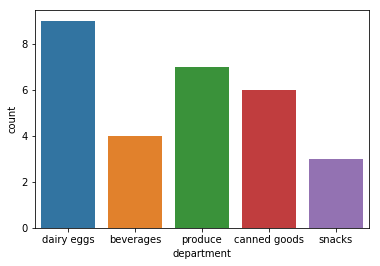

In [92]:
sns.countplot(user_112108.department)

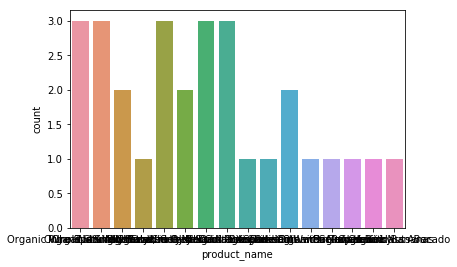

In [95]:
sns.countplot(user_112108.product_name)

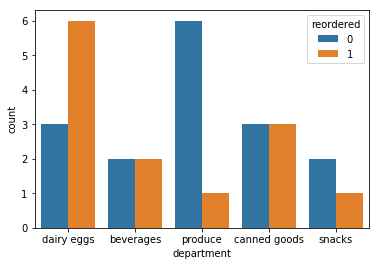

In [96]:
sns.countplot(user_112108.department, hue = user_112108.reordered)

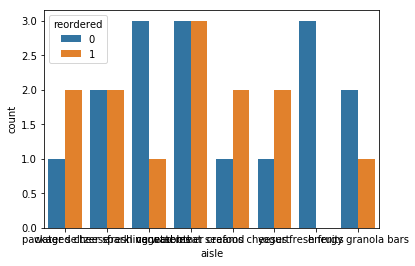

In [97]:
sns.countplot(user_112108.aisle, hue = user_112108.reordered)

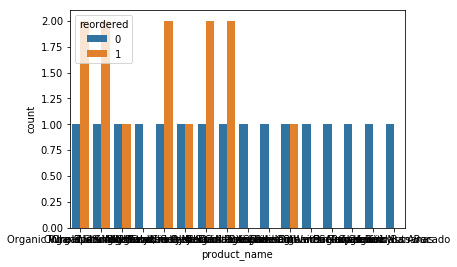

In [98]:
sns.countplot(user_112108.product_name, hue = user_112108.reordered)

In [121]:
final_data_prior = pd.merge(left = pd.merge(left=order_products__prior, right = orders), right = product_desc)

final_data_prior.head(20)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id
0,2,33120,1,1,202279,prior,3,5,9,8.0,86,16
1,26,33120,5,0,153404,prior,2,0,16,7.0,86,16
2,120,33120,13,0,23750,prior,11,6,8,10.0,86,16
3,327,33120,5,1,58707,prior,21,6,9,8.0,86,16
4,390,33120,28,1,166654,prior,48,0,12,9.0,86,16
5,537,33120,2,1,180135,prior,15,2,8,3.0,86,16
6,582,33120,7,1,193223,prior,6,2,19,10.0,86,16
7,608,33120,5,1,91030,prior,11,3,21,12.0,86,16
8,623,33120,1,1,37804,prior,63,3,12,3.0,86,16
9,689,33120,4,1,108932,prior,16,1,13,3.0,86,16


In [123]:
del final_data_prior['eval_set']

In [124]:
final_data_prior.head(1)

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id
0,2,33120,1,1,202279,3,5,9,8.0,86,16


In [125]:
final_data_train = pd.merge(left = pd.merge(left=order_products__train, right = orders), right = product_desc)

In [126]:
del final_data_train['eval_set']

In [127]:
final_data_train.head(1)

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id
0,1,49302,1,1,112108,4,4,10,9.0,120,16


In [128]:
final_data_prior.to_csv('prior.csv', index = False)
final_data_train.to_csv('train.csv', index = False)
